<a href="https://colab.research.google.com/github/ajdhiman/Deep-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(xTrainFull, yTrainFull),(xTest, yTest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
xTrainFull.shape

(60000, 28, 28)

In [5]:
xTrainFull[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
yTrainFull[0]

5

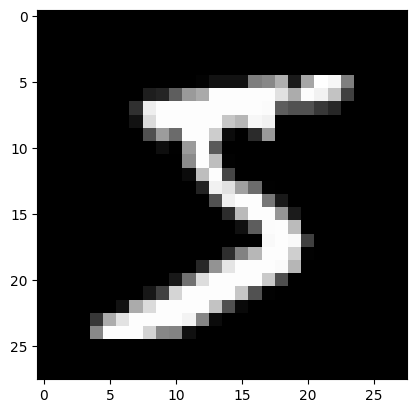

In [7]:
plt.imshow(xTrainFull[0],cmap="gray")

<Axes: >

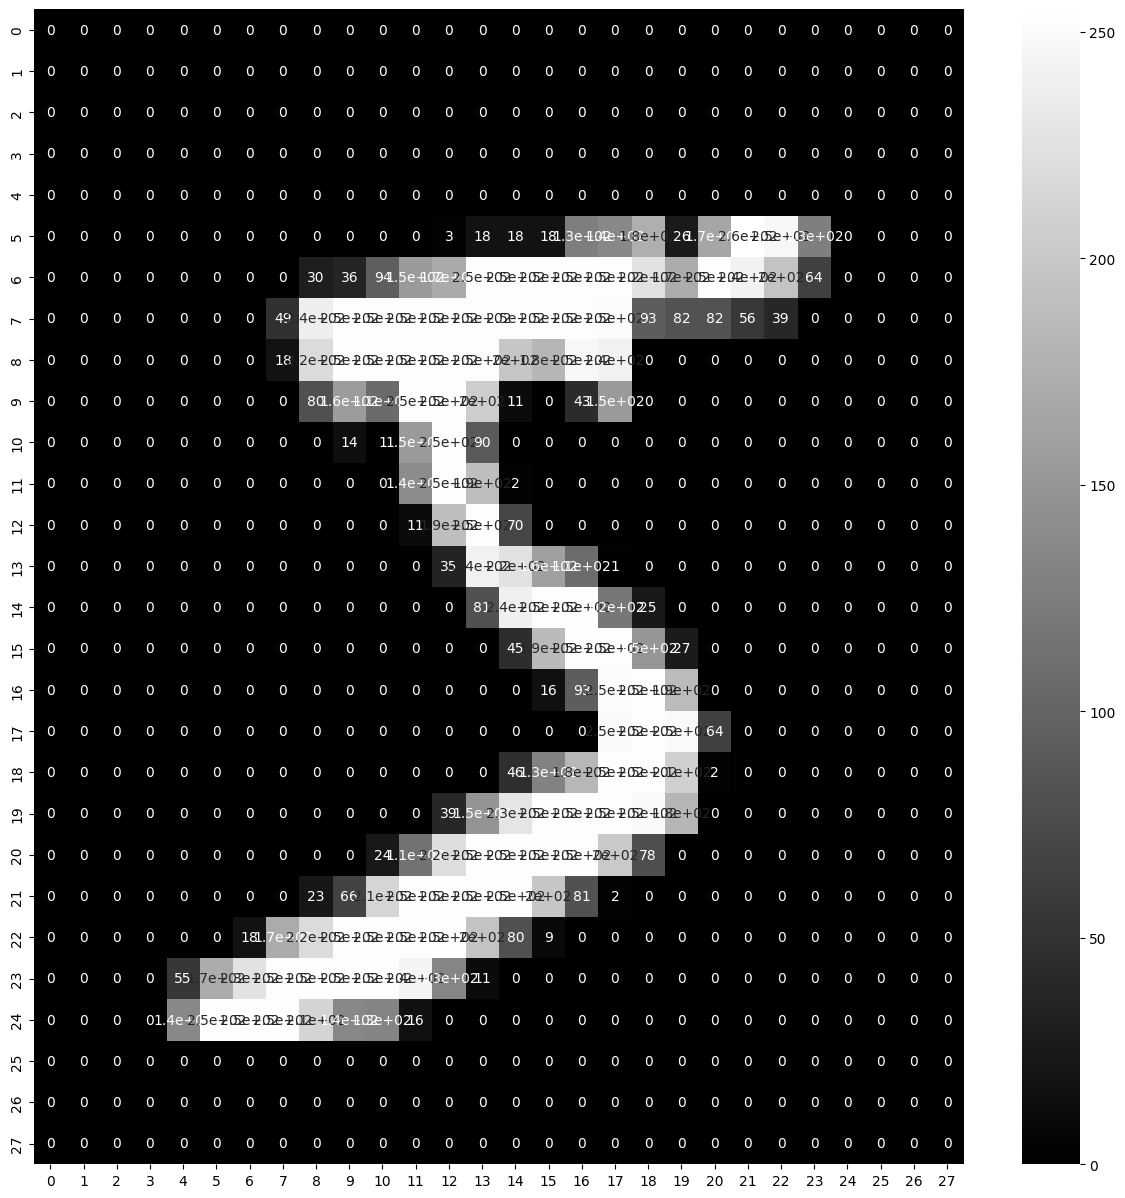

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(xTrainFull[0],
            annot=True,
            cmap="gray")

In [9]:
xValid, xTrain =  xTrainFull[:5000]/255, xTrainFull[5000:]/255
yValid, yTrain =  yTrainFull[:5000], yTrainFull[5000:]

xTest = xTest/255

In [10]:
classes = len(np.unique(yTrain))

In [11]:
layers=[
    tf.keras.layers.Flatten(input_shape=(28,28),name="inputlayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenlayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenlayer2"),
    tf.keras.layers.Dense(classes, activation="softmax", name="outputLayer"),
]

In [12]:
model = tf.keras.models.Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
loss="sparse_categorical_crossentropy"
optimizer= "SGD"
metrics= ["accuracy"]

In [14]:
model.compile(optimizer=optimizer,loss=loss, metrics=metrics)

In [17]:
epochs = 30
validation = (xValid, yValid)
history = model.fit(xTrain, yTrain, epochs=epochs,validation_data=validation, batch_size=32 )

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0723 - accuracy: 0.9802 - val_loss: 0.0901 - val_accuracy: 0.9734
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0672 - accuracy: 0.9820 - val_loss: 0.0840 - val_accuracy: 0.9772
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0626 - accuracy: 0.9827 - val_loss: 0.0832 - val_accuracy: 0.9742
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0586 - accuracy: 0.9841 - val_loss: 0.0797 - val_accuracy: 0.9782
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0547 - accuracy: 0.9854 - val_loss: 0.0784 - val_accuracy: 0.9774
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9864 - val_loss: 0.0786 - val_accuracy: 0.9772
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0481 - accuracy: 0.9875 - val_loss: 0.0746 - val_accuracy:

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

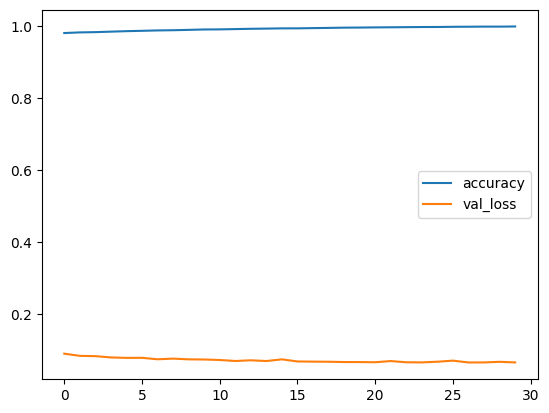

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy','val_loss'])
plt.show

In [24]:
model.evaluate(xTest,yTest)

313/313 [==============================] - 1s 4ms/step - loss: 0.0675 - accuracy: 0.9797


[0.06748609244823456, 0.9797000288963318]

In [25]:
model.save("mnistModel.H5")

In [26]:
xNew = xTest[:3]
yProbablity = model.predict(xNew)

1/1 [==============================] - 0s 77ms/step


In [28]:
yProbablity.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

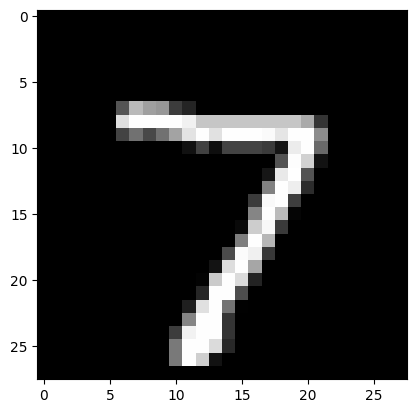

In [29]:
plt.imshow(xNew[0],cmap="gray")

In [31]:
yPred = np.argmax(yProbablity,axis=-1)
yPred

array([7, 2, 1])

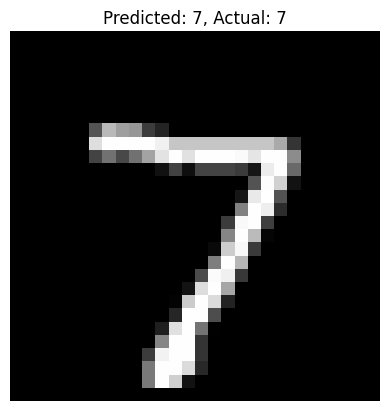

------------------------------------------------------------


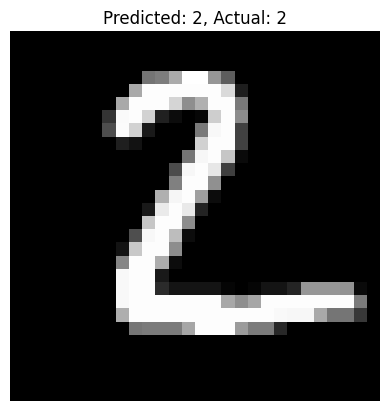

------------------------------------------------------------


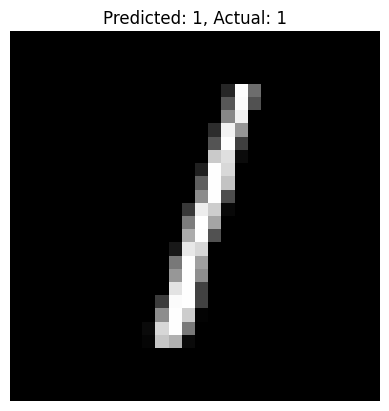

------------------------------------------------------------


In [32]:
for img_array, pred, actual in zip(xNew, yPred, yTest[:3]):
  plt.imshow(img_array,cmap="gray")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)

# Transfer Learning

In [33]:
pre_trained_model = tf.keras.models.load_model("mnistModel.H5")

In [34]:
pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [42]:
for layer in pre_trained_model.layers:
  print(f"{layer.name} : {layer.trainable}")

inputlayer : True
hiddenlayer1 : True
hiddenlayer2 : True
outputLayer : True


In [44]:
for layer in pre_trained_model.layers[:-1]: #Leaving softmax layer for binary even odd classification
  layer.trainable = False

In [45]:
for layer in pre_trained_model.layers:
  print(f"{layer.name} : {layer.trainable}")

inputlayer : False
hiddenlayer1 : False
hiddenlayer2 : False
outputLayer : True


In [46]:
lower_pretrained_layers =  pre_trained_model.layers[:-1]

In [49]:
model_EvenOdd = tf.keras.models.Sequential(lower_pretrained_layers)
model_EvenOdd.add(tf.keras.layers.Dense(2,activation="softmax"))

In [50]:
model_EvenOdd.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [52]:
def update_even_odd_labels(labels):
  for i, label in enumerate(labels):
    labels[i] = np.where(label%2==0,1,0) #1 is Even, 0 is Odd

  return labels


In [62]:
 yTrain_EvenOdd, yTest_EvenOdd, yValid_EvenOdd = update_even_odd_labels([yTrain, yTest, yValid])

In [57]:
loss="sparse_categorical_crossentropy"
optimizer= "SGD"
metrics= ["accuracy"]

model_EvenOdd.compile(
    loss=loss, optimizer=optimizer, metrics=metrics
)

In [66]:
epochs = 10
validation = (xValid, yValid_EvenOdd)
history = model_EvenOdd.fit(xTrain, yTrain_EvenOdd, epochs=epochs,validation_data=validation, batch_size=32 )

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1209 - accuracy: 0.9584 - val_loss: 0.1121 - val_accuracy: 0.9590
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1074 - accuracy: 0.9625 - val_loss: 0.1058 - val_accuracy: 0.9640
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1018 - accuracy: 0.9648 - val_loss: 0.1043 - val_accuracy: 0.9632
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0984 - accuracy: 0.9654 - val_loss: 0.0997 - val_accuracy: 0.9658
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0960 - accuracy: 0.9663 - val_loss: 0.0979 - val_accuracy: 0.9666
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0943 - accuracy: 0.9666 - val_loss: 0.0961 - val_accuracy: 0.9660
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0928 - accuracy: 0.9673 - val_loss: 0.0952 - val_accuracy:

In [67]:
model.evaluate(xTest,yTest_EvenOdd)

313/313 [==============================] - 1s 3ms/step - loss: 0.0425 - accuracy: 0.9853


[0.04247235506772995, 0.9853000044822693]

In [70]:
New = xTest[:3]
yProbablity = model_EvenOdd.predict(xNew)
yProbablity.round(3)

1/1 [==============================] - 0s 325ms/step


array([[0.999, 0.001],
       [0.   , 1.   ],
       [0.95 , 0.05 ]], dtype=float32)

In [72]:
yPred = np.argmax(yProbablity,axis=-1)
yPred

array([0, 1, 0])

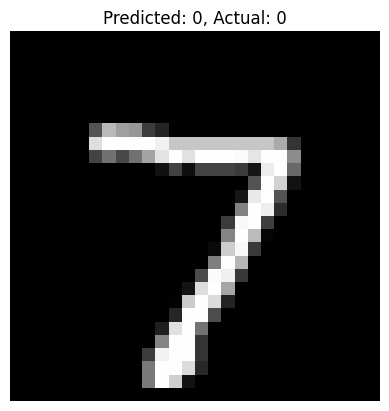

------------------------------------------------------------


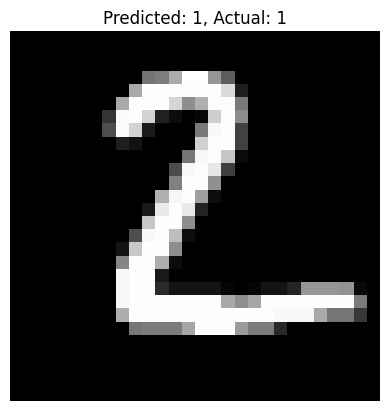

------------------------------------------------------------


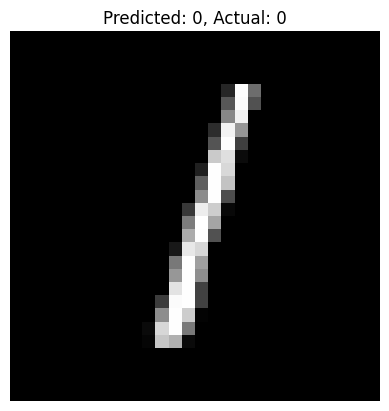

------------------------------------------------------------


In [73]:
for img_array, pred, actual in zip(xNew, yPred, yTest_EvenOdd[:3]):
  plt.imshow(img_array,cmap="gray")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)